In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [33]:
input_patterns = np.array( [ [0, 0], [0, 1], [1, 0], [1, 1] ] ) #act of input neurons 
targets = np.array ([ [0], [1], [1], [0] ]) #target act of output neurons 

In [9]:
np.random.seed(2020)

In [10]:
weight_dict = dict()
weight_dict['H'] = {'I': np.random.uniform(-1, 1, size = (2, 2))}
#input to hidden weights 

In [11]:
print(weight_dict)

{'H': {'I': array([[ 0.97255366,  0.74678389],
       [ 0.01949105, -0.45632857]])}}


In [12]:
weight_dict['Out'] = {'H': np.random.uniform(-1, 1, size = (2, 1))}
#output neurons weight from hidden 

In [13]:
print(weight_dict)

{'H': {'I': array([[ 0.97255366,  0.74678389],
       [ 0.01949105, -0.45632857]])}, 'Out': {'H': array([[-0.32616254],
       [-0.56609147]])}}


In [14]:
bias_dict = {'H': np.random.uniform(-1, 1, size = (2, )), 
             'Out': np.random.uniform(-1, 1, size = (1,)) }

In [34]:
def Relu(x):
    y = np.copy(x)
    indexes = np.where(x < 0)
    y[indexes] = 0
    return y  

def Relu_derivative(x): #slope of relu function 
    y = np.ones_like(x)
    indexes = np.where(x < 0)
    y[indexes] = 0
    return y  
    

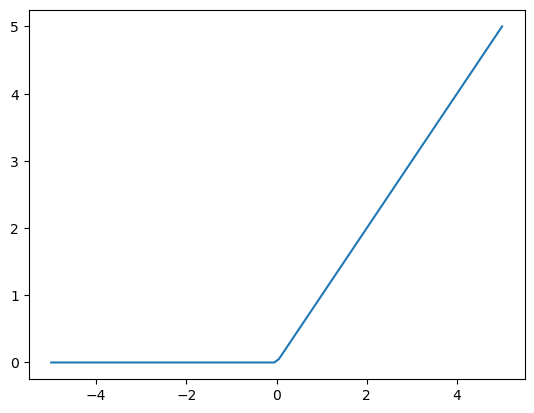

In [17]:
plt.figure()
x = np.linspace(-5, 5, 100)
plt.plot(x, Relu(x))

In [40]:
def forward(input_patterns, weight_dict, bias_dict):
    act_dict = {}
    state_dict = {}
    state_dict['H'] = np.dot(input_patterns, weight_dict['H']['I']) + bias_dict['H'] #hidden state act 
    act_dict['H'] = Relu(state_dict['H']) #firing rates hid neurons
    state_dict['Out'] = np.dot(act_dict['H'], weight_dict['Out']['H']) + bias_dict['Out']
    act_dict['Out'] = Relu(state_dict['Out']) #firing rate output
    return state_dict, act_dict

In [49]:
state_dict, act_dict = forward(input_patterns, weight_dict, bias_dict)
print(state_dict, act_dict)

{'H': array([[-0.44704571, -0.31336881],
       [-0.42755466, -0.76969739],
       [ 0.52550794,  0.43341508],
       [ 0.54499899, -0.02291349]]), 'Out': array([[0.72431787],
       [0.72431787],
       [0.30756428],
       [0.54655961]])} {'H': array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.52550794, 0.43341508],
       [0.54499899, 0.        ]]), 'Out': array([[0.72431787],
       [0.72431787],
       [0.30756428],
       [0.54655961]])}


In [46]:
def backward(weight_dict, state_dict, act_dict, targets):
    grad_dict = {}
    grad_dict['Out'] = (act_dict['Out'] - targets) * Relu_derivative(state_dict['Out'] ) # DE/dzout = DE/Daout * Daout/dzout 
    error = np.sum(0.5 * (targets - act_dict['Out']) ** 2) 
    grad_dict['H'] = np.dot(grad_dict['Out'], weight_dict['Out']['H'].T) * Relu_derivative(state_dict['H']) #De/dzhidden = De/dzout * dzout/dahidden * dahidden/dzhidden
    return grad_dict, error 

In [44]:
print(state_dict)


{'H': array([[-0.44704571, -0.31336881],
       [-0.42755466, -0.76969739],
       [ 0.52550794,  0.43341508],
       [ 0.54499899, -0.02291349]]), 'Out': array([[0.72431787],
       [0.72431787],
       [0.30756428],
       [0.54655961]])}


In [47]:
grad_dict, error = backward(weight_dict, state_dict, act_dict, targets)

In [48]:
print(grad_dict)
print(error)

{'Out': array([[ 0.72431787],
       [-0.27568213],
       [-0.69243572],
       [ 0.54655961]]), 'H': array([[-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [ 0.22584659,  0.39198195],
       [-0.17826727, -0.        ]])}
0.6894158221039279


In [ ]:
def step(weight_dict, bias_dict, grad_dict, act_dict, learning_rate):
    for 